# Movie lens 100k Data Set - Data Analysis and Processing
**This data set contains:**
* 100,000 ratings (1-5) from 943 users on 1682 movies. 
* Each user has rated at least 20 movies. 
* Simple demographic info for the users (age, gender, occupation, zip)

**Context:**
* Collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998.

## Files
**u.data**
* The full u data set, 100000 ratings by 943 users on 1682 items.
* Each user has rated at least 20 movies.  
* Users and items are numbered consecutively from 1.
* The data is randomly ordered.
* user id | movie id | rating | timestamp.

**u.item**
* Information about the items (movies).
* movie id | movie title | release date | video release date |
    IMDb URL | unknown | Action | Adventure | Animation |
    Children's | Comedy | Crime | Documentary | Drama | Fantasy |
    Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
    thriller | War | Western |
* The last 19 fields are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not; movies can be in several genres at once. The movie ids are the ones used in the u.data data set.

**u.genre**
* Numbered list of genres.

**u.user** 
* Demographic information about the users
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

There are also pre-split 5-fold validation (u1/u2/u3/u4/u5) sets and a disjoint set of testing data (ua / ub).

## Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

### Read in data

In [102]:
rating_df= pd.read_csv("data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

item_df = pd.read_csv("data/u.item", sep="|",encoding="latin-1", 
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("data/u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])

In [1]:
print("Ratings Matrix")
print(rating_df.head(), '\n')

print('Movie Data')
print(item_df[["movie_id", "movie_title", "release_date", "video_release_date", "imbd_url"]][0:5], '\n')

print('User Data')
print(user_df.head())


Ratings Matrix


NameError: name 'rating_df' is not defined

### Summary Statistics
* Number of movies / users.
* Summary statistics of movie each genre, release dates
* Summary statistics for user age, gender, occupation

#### Movie Statistics 
* Number of movies
* Number of each genre (table and graph)
* Top 3 genres
* Which genres occur together the most
* Distribution of release dates 

In [4]:
# Number of movies
print("This dataset surveys:", len(item_df), "movies.")

This dataset surveys: 1682 movies.


In [5]:
# Number of each genre
num_genres = item_df[["unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"]].sum()

print(num_genres)

unknown          2
action         251
adventure      135
animation       42
childrens      122
comedy         505
crime          109
documentary     50
drama          725
fantasy         22
film_noir       24
horror          92
musical         56
mystery         61
romance        247
sci-fi         101
thriller       251
war             71
western         27
dtype: int64


c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

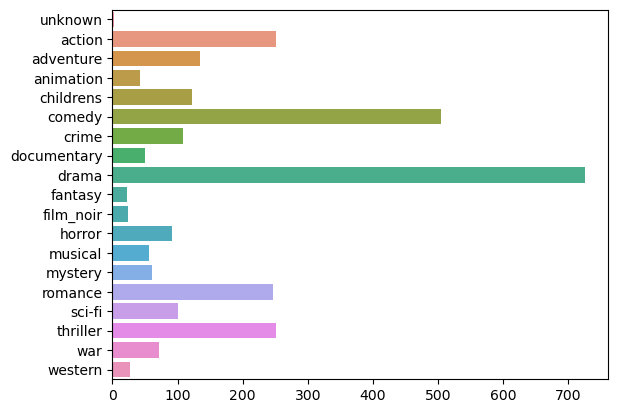

In [6]:
sns.barplot(y=num_genres.index, x=num_genres, orient='h')

In [7]:
# Top-3 genres
print("The top three genres are: ", end='')
num_genres.nlargest(3)

The top three genres are: 

drama     725
comedy    505
action    251
dtype: int64

In [68]:
# Which movies occur together the most?
# Code
    # filter for each movie genre,
    # For that genre, take the most co-occuring genre

from operator import index


genres =["unknown", "action", "adventure", "animation", "childrens", "comedy",
         "crime", "documentary", "drama", "fantasy", 
         "film_noir", "horror", "musical", "mystery", "romance", 
         "sci-fi", "thriller", "war", "western"]

genres_df = item_df[genres]

for genre in genres:
    genre_df = genres_df[genres_df[genre] == 1].copy()
    most_coocurring = genre_df.sum().nlargest(2)
    co_genre = list(most_coocurring.index.values)[1]
    print(genre, "with", co_genre, "for", most_coocurring.iloc[1])


unknown with action for 0
action with thriller for 84
adventure with action for 75
animation with childrens for 33
childrens with adventure for 42
comedy with romance for 97
crime with drama for 48
documentary with drama for 3
drama with romance for 99
fantasy with childrens for 16
film_noir with thriller for 14
horror with thriller for 19
musical with comedy for 22
mystery with thriller for 32
romance with drama for 99
sci-fi with action for 54
thriller with action for 84
war with drama for 38
western with action for 8


c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


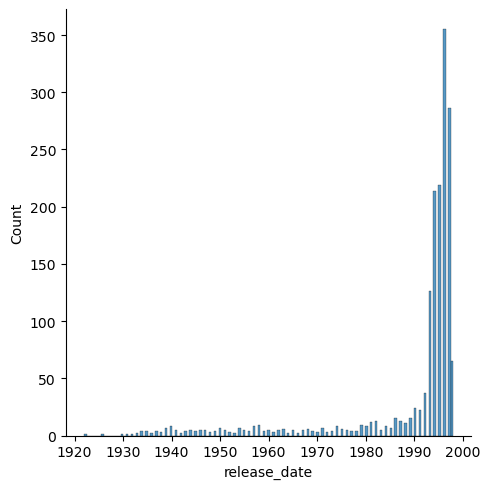

In [8]:
# Graphing Movie release year distribution
year_released = (item_df["release_date"].str.split("-")).dropna()
year_released = year_released.apply(lambda x: x[2]).apply(int)

sns.displot(year_released)


In [9]:
# Top 4 years movies in this data set were released.
year_released.value_counts().nlargest(4)

release_date
1996    355
1997    286
1995    219
1994    214
Name: count, dtype: int64

c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='release_date'>

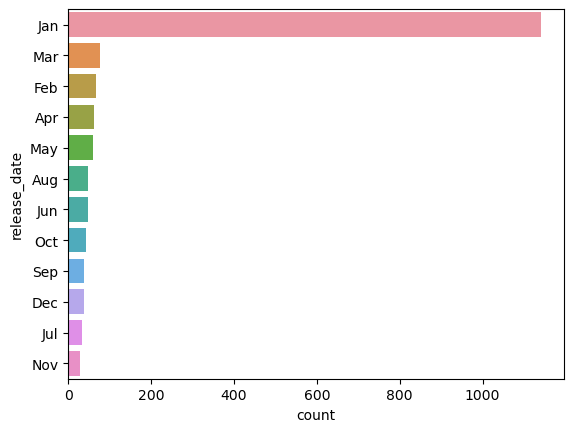

In [10]:
# Graphing Movie release month distribution
month_released = (item_df["release_date"].str.split("-")).dropna()

month_released = month_released.apply(lambda x: x[1])
month_released = month_released.value_counts()

sns.barplot(y=month_released.index, x=month_released, orient='h')


#### User Stats
* Number of users
* Average age of a user
* Percentage of gender
* Mode occupation

Number of users: 943
Average age: 34.05. Median Age: 31.0
Male: 71.05%. Female: 28.95%
There three most common jobs are
----------
occupation
student     196
other       105
educator     95
Name: count, dtype: int64


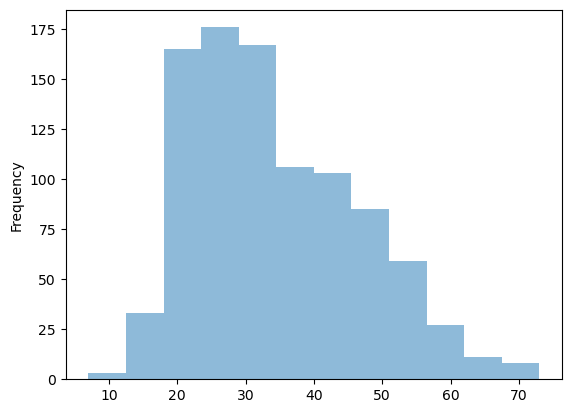

In [191]:
# Number of users
print("Number of users:", len(user_df))

# Average & mediamn age of a user
print(f"Average age: {user_df['age'].mean():.2f}. Median Age: {user_df['age'].median()}")
ax = user_df["age"].plot.hist(bins=12, alpha=0.5)

# Gender make up
print(f"Male: {len(user_df[user_df['gender'] == 'M']) / len(user_df)*100:.2f}%. Female: {len(user_df[user_df['gender'] == 'F']) / len(user_df)*100:.2f}%")

# Top 5 most common occupations.
job_df = user_df["occupation"].value_counts().nlargest(3)
print("There three most common jobs are\n","----------\n", job_df, sep="")

### Cross-Connection Analysis
* Top/lowest-k rated movies: overall, genre, gender, occupation, age.

In [110]:
# Combine data

df = item_df.merge(rating_df, on='movie_id', how='inner')
df = df.merge(user_df, on='user_id')

In [206]:
# Count number of reviews / movie
grouped = df[["movie_title", "rating"]].groupby("movie_title")["rating"]
ranking = grouped.count().to_frame()
ranking = ranking.rename(columns ={"rating": "num_reviews"})
ranking_df = item_df.copy().merge(ranking, on="movie_title")

# Mean rating
rating =grouped.mean().to_frame()
ranking_df = ranking_df.merge(rating, on="movie_title")

In [185]:
# top-5 most-reviewed movies
print("top 5 most-ranked\n", ranking_df[["movie_title", "num_reviews", "rating"]].nlargest(5, columns=["num_reviews"]), "\n",sep="")

# top-5 rating
mask1 = ranking_df["num_reviews"] >= 10
print("top 5 in ratings w/ at least 10 reviews\n", ranking_df[["movie_title", "num_reviews", "rating"]].loc[mask1].nlargest(5, columns=["rating"]), "\n", sep="")

# least-5 in rating
mask1 = ranking_df["num_reviews"] >= 10
print("top 5 lowest in ratings w/ at least 10 reviews\n", ranking_df[["movie_title", "num_reviews", "rating"]].loc[mask1].nsmallest(5, columns=["rating"]), "\n", sep="")

top 5 most-ranked
                   movie_title  num_reviews    rating
49            Star Wars (1977)          583  4.358491
258             Contact (1997)          509  3.803536
99                Fargo (1996)          508  4.155512
180  Return of the Jedi (1983)          507  4.007890
294           Liar Liar (1997)          485  3.156701

top 5 in ratings w/ at least 10 reviews
                                           movie_title  num_reviews    rating
411                              Close Shave, A (1995)          112  4.491071
321                            Schindler's List (1993)          298  4.466443
168                         Wrong Trousers, The (1993)          118  4.466102
486                                  Casablanca (1942)          243  4.456790
113  Wallace & Gromit: The Best of Aardman Animatio...           67  4.447761

top 5 lowest in ratings w/ at least 10 reviews
                                     movie_title  num_reviews    rating
427   Children of the Corn: T

In [188]:
# Highest rated per genre

print("Top 5 per genre (w/ at least 10 reviews)")
for genre in genres:
    print(genre)
    mask = (ranking_df["num_reviews"] >= 10) & (ranking_df[genre] == 1)
    print(ranking_df[["movie_title", "num_reviews", "rating"]].loc[mask].nlargest(5, columns=["rating"]), "\n", sep="")

Top 5 per genre (w/ at least 10 reviews)
unknown
Empty DataFrame
Columns: [movie_title, num_reviews, rating]
Index: []

action
                         movie_title  num_reviews    rating
49                  Star Wars (1977)          583  4.358491
126            Godfather, The (1972)          413  4.283293
173   Raiders of the Lost Ark (1981)          420  4.252381
316                   Titanic (1997)          350  4.245714
171  Empire Strikes Back, The (1980)          367  4.204360

adventure
                         movie_title  num_reviews    rating
49                  Star Wars (1977)          583  4.358491
173   Raiders of the Lost Ark (1981)          420  4.252381
513        Lawrence of Arabia (1962)          173  4.231214
171  Empire Strikes Back, The (1980)          367  4.204360
501        African Queen, The (1951)          152  4.184211

animation
                                           movie_title  num_reviews    rating
411                              Close Shave, A (1995

In [217]:
# top-5 per age group

# under 18
youngsters = df["age"] < 18

# 18 to 25
young_adults =  (25 > df["age"]) & ( df["age"] >= 18)

# 25 to 50
adults =  (50 > df["age"]) & ( df["age"] >= 25)

# older than 49
grannies =  df["age"] >= 50

age_groups = {"youngsters" : youngsters, "young_adults": young_adults, "adults":adults,  "grannies": grannies}

for group in age_groups:
    print(group, "top 5 most rated")
    temp = df[["movie_title", "rating", "age"]].loc[age_groups[group]].groupby("movie_title")["rating"]
    count = temp.count().to_frame().rename(columns={"rating" : "num_reviews"})
    rating = temp.mean().to_frame()

    temp_merged = count.merge(rating, on="movie_title")
    
    mask = temp_merged["num_reviews"] > 10

    print(temp_merged.loc[mask].nlargest(5, columns=["rating"]))
    print("")

youngsters top 5 most rated
                           num_reviews    rating
movie_title                                     
Titanic (1997)                      15  4.733333
Return of the Jedi (1983)           18  4.555556
Star Wars (1977)                    19  4.526316
L.A. Confidential (1997)            11  4.363636
Rock, The (1996)                    13  4.307692

young_adults top 5 most rated
                                                    num_reviews    rating
movie_title                                                              
Wallace & Gromit: The Best of Aardman Animation...           12  4.750000
Shawshank Redemption, The (1994)                             71  4.633803
Casablanca (1942)                                            35  4.600000
Titanic (1997)                                               81  4.493827
Dr. Strangelove or: How I Learned to Stop Worry...           33  4.484848

adults top 5 most rated
                                                    num

In [220]:
# top 5 per gender

female = df["gender"] == "F"

male = df["gender"] == "M"

groups = {"Dudes" : male, "Women": female}

for group in groups:
    print(group, "top 5 most rated")
    temp = df[["movie_title", "rating", "gender"]].loc[groups[group]].groupby("movie_title")["rating"]
    count = temp.count().to_frame().rename(columns={"rating" : "num_reviews"})
    rating = temp.mean().to_frame()

    temp_merged = count.merge(rating, on="movie_title")
    
    mask = temp_merged["num_reviews"] > 10

    print(temp_merged.loc[mask].nlargest(5, columns=["rating"]))
    print("")

Dudes top 5 most rated
                                                    num_reviews    rating
movie_title                                                              
Casablanca (1942)                                           188  4.473404
Wrong Trousers, The (1993)                                   91  4.472527
Close Shave, A (1995)                                        93  4.462366
Third Man, The (1949)                                        60  4.433333
Wallace & Gromit: The Best of Aardman Animation...           52  4.423077

Women top 5 most rated
                                                    num_reviews    rating
movie_title                                                              
Schindler's List (1993)                                      79  4.632911
Close Shave, A (1995)                                        19  4.631579
Shawshank Redemption, The (1994)                             64  4.562500
Wallace & Gromit: The Best of Aardman Animation...           15  

In [228]:
# top 5 per occupation

occuptations_list = user_df["occupation"].unique()

groups = {x : df["occupation"] == x for x in occuptations_list}

for group in groups:
    print(group, "top 5 most rated")
    temp = df[["movie_title", "rating", "occupation"]].loc[groups[group]].groupby("movie_title")["rating"]
    count = temp.count().to_frame().rename(columns={"rating" : "num_reviews"})
    rating = temp.mean().to_frame()

    temp_merged = count.merge(rating, on="movie_title")
    
    mask = temp_merged["num_reviews"] > 10

    print(temp_merged.loc[mask].nlargest(5, columns=["rating"]))
    print("")

technician top 5 most rated
                            num_reviews    rating
movie_title                                      
Princess Bride, The (1987)           12  4.666667
Chasing Amy (1997)                   16  4.562500
Star Wars (1977)                     22  4.454545
Blade Runner (1982)                  12  4.416667
Godfather, The (1972)                13  4.384615

other top 5 most rated
                                  num_reviews    rating
movie_title                                            
Schindler's List (1993)                    37  4.729730
Lawrence of Arabia (1962)                  13  4.538462
It's a Wonderful Life (1946)               25  4.480000
Boot, Das (1981)                           23  4.434783
Shawshank Redemption, The (1994)           30  4.433333

writer top 5 most rated
                                        num_reviews    rating
movie_title                                                  
Psycho (1960)                                    16  4.87